**Sri Vishnu Vardhan Kavili**

**https://colab.research.google.com/drive/1zKBRHCcWF0J8fDSOHkvI76Y6W5v8vk2E?usp=sharing**

*Expand all notebook bocks/sections and ensure code has properly executed, save as pdf(above left menu) when completed to submit to Canvas.*

## **Regression for house price estimation using the Boston Housing Price dataset**

#### **Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### **Preparing the data**

#### **Normalizing the data**

In [ ]:
# Normalization is a common preprocessing step performed on input data to bring all the features onto a similar scale.
# It is just like centering them to a origin.
# Normalizing the data can also contribute to a smoother and more interpretable plotting process, helping in a better understanding
# of the relationships and patterns present in the data.

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### **Building our model**

#### Model definition

In [ ]:
def build_model3():
    model3 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model3

### **Validating our approach using K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    model3.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores # PERFORMANCE SCORE of each train and test operations done by each fold

[1.9525707960128784,
 2.6484487056732178,
 2.3902878761291504,
 2.3203608989715576]

In [ ]:
np.mean(all_scores)

2.327917069196701

#### **Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### **Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### **Plotting validation scores**

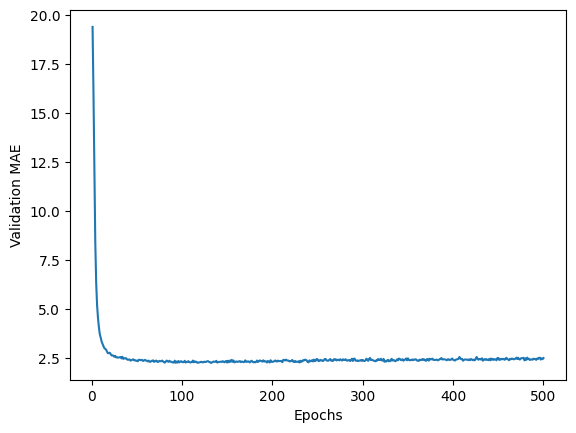

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### **Plotting validation scores, excluding the first 10 data points**

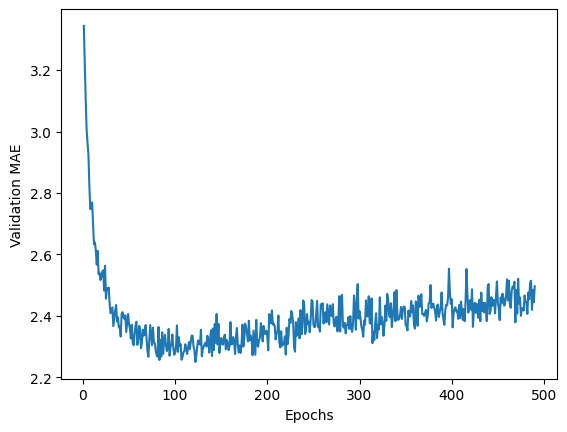

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### **Training the final model**

In [ ]:
model3 = build_model3()
model3.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model3.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.3790 - mae: 2.5215


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Loss - [525.984375, 434.3176574707031, 323.19415283203125, 212.1588897705078, 126.15132904052734, 76.66558074951172, 52.39634323120117, 38.91028594970703, 31.119388580322266, 26.567087173461914, 23.71906280517578, 21.648054122924805, 19.9605712890625, 18.545061111450195, 17.496337890625, 16.3366756439209, 15.386466979980469, 14.622956275939941, 13.886019706726074, 13.257347106933594, 12.810702323913574, 12.343220710754395, 11.680828094482422, 11.368483543395996, 10.81289291381836, 10.71766185760498, 10.073935508728027, 9.946648597717285, 9.79233455657959, 9.714103698730469, 9.339253425598145, 9.128484725952148, 9.118696212768555, 8.961590766906738, 8.89211368560791, 8.554216384887695, 8.539316177368164, 8.551876068115234, 8.319808959960938, 8.25963306427002, 7.97755765914917, 8.18761157989502, 7.706904888153076, 7.795738697052002, 7.623216152191162, 7.564919471740723, 7.35854434967041, 7.3556718826293945, 7.377177715301514, 7.272449016571045, 7.140110015869141, 7.298131942749023, 6.923

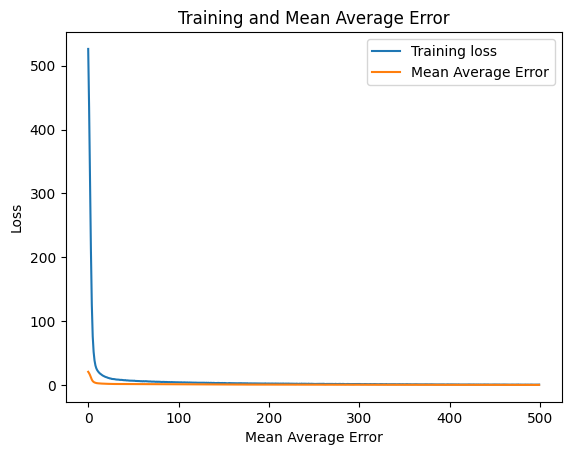

In [ ]:
loss = history.history["loss"]
print(f'Loss - {loss}')
mae = history.history["mae"]
print(f'Mean Average Error - {mae}')
plt.plot(loss, label="Training loss")
plt.plot(mae, label="Mean Average Error")
plt.title("Training and Mean Average Error")
plt.xlabel("Mean Average Error")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_mae_score

2.52152419090271

### **Generating predictions on new data**

In [ ]:
predictions = model3.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.331491], dtype=float32)

## **Answering couple of questions ragrding our CLASSIFIER**

**A Set of questions**

 &emsp;**1)** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**2)** Why is this problem a case of regression (rather than classification)?

 &emsp;**3)** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**3.2.1** Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

&emsp;Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

 **1)**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

a) Firstly, k-fold is somewhat similar to the train-test split process, where the splits will take place repeatedly, which is done to the datasets.

b) A "fold" is a "**subset**" of our dataset. Each fold contains multiple samples or data points.

c) The whole dataset is divided into k no of samples. This k is a random number. Also, the size of each "fold" is predefined of sets.
  For Example k = 5 or 10.

d) A datset x will be divided by 5 or 10 parts.

e) Now, Let's say size of datset  = x
(x/5) or (x/10) will be the size of each fold/subset/fold.

f) Each of these subsets (folds) is split into training and test data randomly, but the key point is that within each iteration of k-fold cross-validation, one fold is used as the validation set (test data), and the remaining k-1 folds are used for training.

  "**For example**":

  let's say we have k=5 for 5-fold cross-validation. The dataset is divided into 5 equally-sized folds: fold 1, fold 2, fold 3, fold 4, and fold 5. In the first iteration, fold 1 is used as the validation set, and folds 2, 3, 4, and 5 are combined to form the training set. The model is then trained on this training set and evaluated on fold 1.

  In the second iteration, fold 2 becomes the validation set, and the remaining folds (1, 3, 4, and 5) are used for training. The model is trained on these folds and evaluated on fold 2.

  This process continues for the remaining iterations, with each fold serving as the validation set once, and the remaining folds used for training. The performance of the model is evaluated on each validation set, and the results are typically averaged across all iterations to get an overall estimate of the model's performance.

 **2)**

   >Why is this problem a case of regression (rather than classification)?

  Because, if we look at the dataset, we are working with, we are dealing with a series of "**range of value, wich are in an unsorted order**". When we say "unsorted order", that means, as we progress throught the values, uptill certain sequence, the values might be "**Ascending**". Then right after that, the value will start to "**Descend**". Then again after thi point, there might be a mix of "**Ascending and Descending**". In this case, we can clearly see the "**FLUCTUATIONS**" of the values. It will "**NOT**" seem to be in a "**SEQUENTIAL**" order. This behavior of "Fluctuations" in data, is called "**REGRESSION DATA**". So, the house pries follow the same pattern. As days go by, the price of the houses will always keep going up and then suddenly down, and will continue this process. So, there are more than "**TWO CASES**" involved. The two cases as binary cases: "**0 and 1, YES / NO**" etc... So the two cases case is called "**CLASSIFICATION**". The example is what we have seen in the "**SENTIMENT ANALYSIS**" concept. Either "**POSITIVE**" or "**NEGATIVE**". Since we see the "**TREND**", but not "**DISCRETE VALUES**", We call probelm like these as "**REGRESSION**".

 **3)**

   >Does your model suffer from overfitting? If so, what would you suggest doing about it?

As we can see from the above "**mae vs loss plot**", The result of the lines of both the loss and mae, seems to be inversly prroportion. As loss is reducing, the mae seems to be increasing. Basically, the plot is an "L" shaped plot. Towards the end, mae, which is on the x-axis overlapped as the loss which is on the y-axis is decreasing.

From origin the y-axis has 0 to 500, and the x-axis has 0-500.

This is a clear picture of "**over-fitting**". That mean the "**model seem to "MEMORIZE" the data**". This happens due to the following cases:

  a) Lack of the required, and crucial data

  b)  There might be dominace in data in the sets. Where the data isn inbalenced, and lot of repeating values are there. No equal proportion of split of the data might be there.

The above two are potential causes for the over-fitting to occur.

To prevent this to happen,

  a) We need to have equal set of values sparsed between the values

  b) There should not be much "**MISSING VALUES**".

  c) We should make sure that we have an updated version of the dataset.

 **4**

   >Is mean absolute error (MAE) a good metric of success in this case? Why
(not)?

 We can an **Increasing trend** of the **validation MAE**: If the validation MAE starts to increase as the epochs progress, it could indicate that the model is overfitting the training data. Overfitting occurs when the model learns the training data too well and fails to generalize to new, unseen data. In this case, the MAE may not be a good metric as it fails to capture the increased errors on unseen data.

## **Snippets which can be a some of the potential STRUCTURES for our classifier**:

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

## **CONCLUSIONS**

#####**Lessons learned**

Learnt about a new "High level" process similar to the train-test split method, which is the "**k-fold**" method. I loved the way it works. Will have to learn more about it.